# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

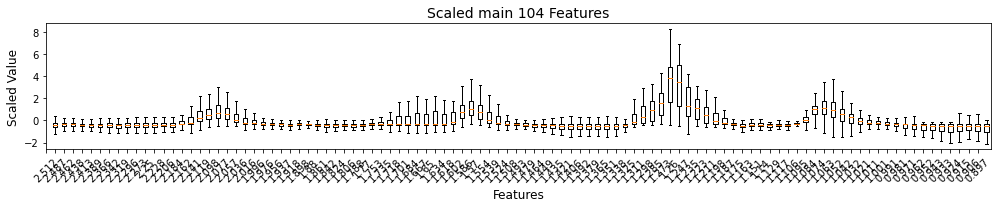

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

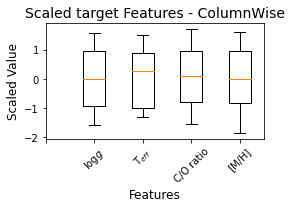

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

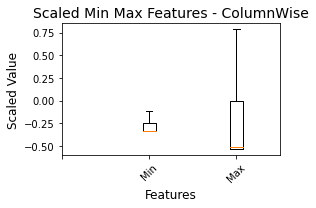

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:32 - loss: 1.8454 - gravity_loss: 0.4536 - c_o_ratio_loss: 0.4607 - metallicity_loss: 0.4555 - temperature_loss: 0.4756 - gravity_mae: 0.8505 - c_o_ratio_mae: 0.8750 - metallicity_mae: 0.8506 - temperature_mae: 0.8828

 2/13 [===>..........................] - ETA: 50s - loss: 1.8356 - gravity_loss: 0.4627 - c_o_ratio_loss: 0.4570 - metallicity_loss: 0.4518 - temperature_loss: 0.4640 - gravity_mae: 0.8630 - c_o_ratio_mae: 0.8719 - metallicity_mae: 0.8467 - temperature_mae: 0.8689 

 3/13 [=====>........................] - ETA: 47s - loss: 1.8100 - gravity_loss: 0.4647 - c_o_ratio_loss: 0.4587 - metallicity_loss: 0.4508 - temperature_loss: 0.4358 - gravity_mae: 0.8652 - c_o_ratio_mae: 0.8751 - metallicity_mae: 0.8444 - temperature_mae: 0.8349

 4/13 [========>.....................] - ETA: 45s - loss: 1.7779 - gravity_loss: 0.4643 - c_o_ratio_loss: 0.4559 - metallicity_loss: 0.4474 - temperature_loss: 0.4103 - gravity_mae: 0.8652 - c_o_ratio_mae: 0.8720 - metallicity_mae: 0.8414 - temperature_mae: 0.7975

 5/13 [==========>...................] - ETA: 41s - loss: 1.7510 - gravity_loss: 0.4662 - c_o_ratio_loss: 0.4530 - metallicity_loss: 0.4458 - temperature_loss: 0.3861 - gravity_mae: 0.8675 - c_o_ratio_mae: 0.8686 - metallicity_mae: 0.8395 - temperature_mae: 0.7569

 6/13 [============>.................] - ETA: 39s - loss: 1.7219 - gravity_loss: 0.4634 - c_o_ratio_loss: 0.4476 - metallicity_loss: 0.4446 - temperature_loss: 0.3663 - gravity_mae: 0.8648 - c_o_ratio_mae: 0.8625 - metallicity_mae: 0.8370 - temperature_mae: 0.7230

 7/13 [===============>..............] - ETA: 36s - loss: 1.6896 - gravity_loss: 0.4609 - c_o_ratio_loss: 0.4374 - metallicity_loss: 0.4437 - temperature_loss: 0.3476 - gravity_mae: 0.8620 - c_o_ratio_mae: 0.8504 - metallicity_mae: 0.8360 - temperature_mae: 0.6935

 8/13 [=================>............] - ETA: 32s - loss: 1.6615 - gravity_loss: 0.4609 - c_o_ratio_loss: 0.4259 - metallicity_loss: 0.4420 - temperature_loss: 0.3327 - gravity_mae: 0.8622 - c_o_ratio_mae: 0.8348 - metallicity_mae: 0.8343 - temperature_mae: 0.6704

 9/13 [===================>..........] - ETA: 28s - loss: 1.6303 - gravity_loss: 0.4570 - c_o_ratio_loss: 0.4162 - metallicity_loss: 0.4408 - temperature_loss: 0.3162 - gravity_mae: 0.8575 - c_o_ratio_mae: 0.8207 - metallicity_mae: 0.8331 - temperature_mae: 0.6456

10/13 [======================>.......] - ETA: 22s - loss: 1.6055 - gravity_loss: 0.4508 - c_o_ratio_loss: 0.4124 - metallicity_loss: 0.4368 - temperature_loss: 0.3055 - gravity_mae: 0.8499 - c_o_ratio_mae: 0.8152 - metallicity_mae: 0.8279 - temperature_mae: 0.6316

11/13 [========================>.....] - ETA: 15s - loss: 1.5913 - gravity_loss: 0.4469 - c_o_ratio_loss: 0.4136 - metallicity_loss: 0.4313 - temperature_loss: 0.2995 - gravity_mae: 0.8456 - c_o_ratio_mae: 0.8158 - metallicity_mae: 0.8213 - temperature_mae: 0.6285

12/13 [==========================>...] - ETA: 7s - loss: 1.5626 - gravity_loss: 0.4422 - c_o_ratio_loss: 0.4066 - metallicity_loss: 0.4276 - temperature_loss: 0.2862 - gravity_mae: 0.8404 - c_o_ratio_mae: 0.8059 - metallicity_mae: 0.8165 - temperature_mae: 0.6088 

13/13 [==============================] - ETA: 0s - loss: 1.5575 - gravity_loss: 0.4413 - c_o_ratio_loss: 0.4063 - metallicity_loss: 0.4264 - temperature_loss: 0.2836 - gravity_mae: 0.8393 - c_o_ratio_mae: 0.8056 - metallicity_mae: 0.8150 - temperature_mae: 0.6051

13/13 [==============================] - 101s 8s/step - loss: 1.5575 - gravity_loss: 0.4413 - c_o_ratio_loss: 0.4063 - metallicity_loss: 0.4264 - temperature_loss: 0.2836 - gravity_mae: 0.8393 - c_o_ratio_mae: 0.8056 - metallicity_mae: 0.8150 - temperature_mae: 0.6051 - val_loss: 1.1022 - val_gravity_loss: 0.3605 - val_c_o_ratio_loss: 0.3004 - val_metallicity_loss: 0.3608 - val_temperature_loss: 0.0805 - val_gravity_mae: 0.7345 - val_c_o_ratio_mae: 0.6593 - val_metallicity_mae: 0.7369 - val_temperature_mae: 0.2969


Epoch 2/4


 1/13 [=>............................] - ETA: 1:16 - loss: 1.1177 - gravity_loss: 0.3581 - c_o_ratio_loss: 0.3132 - metallicity_loss: 0.3643 - temperature_loss: 0.0821 - gravity_mae: 0.7339 - c_o_ratio_mae: 0.6770 - metallicity_mae: 0.7373 - temperature_mae: 0.3051

 2/13 [===>..........................] - ETA: 1:10 - loss: 1.1052 - gravity_loss: 0.3638 - c_o_ratio_loss: 0.3171 - metallicity_loss: 0.3527 - temperature_loss: 0.0716 - gravity_mae: 0.7418 - c_o_ratio_mae: 0.6828 - metallicity_mae: 0.7223 - temperature_mae: 0.2844

 3/13 [=====>........................] - ETA: 1:02 - loss: 1.1024 - gravity_loss: 0.3608 - c_o_ratio_loss: 0.3288 - metallicity_loss: 0.3484 - temperature_loss: 0.0644 - gravity_mae: 0.7364 - c_o_ratio_mae: 0.6996 - metallicity_mae: 0.7148 - temperature_mae: 0.2700

 4/13 [========>.....................] - ETA: 1:00 - loss: 1.0910 - gravity_loss: 0.3599 - c_o_ratio_loss: 0.3269 - metallicity_loss: 0.3446 - temperature_loss: 0.0597 - gravity_mae: 0.7353 - c_o_ratio_mae: 0.6976 - metallicity_mae: 0.7088 - temperature_mae: 0.2608

 5/13 [==========>...................] - ETA: 52s - loss: 1.0705 - gravity_loss: 0.3541 - c_o_ratio_loss: 0.3217 - metallicity_loss: 0.3374 - temperature_loss: 0.0573 - gravity_mae: 0.7277 - c_o_ratio_mae: 0.6900 - metallicity_mae: 0.7014 - temperature_mae: 0.2570 

 6/13 [============>.................] - ETA: 44s - loss: 1.0598 - gravity_loss: 0.3536 - c_o_ratio_loss: 0.3186 - metallicity_loss: 0.3307 - temperature_loss: 0.0569 - gravity_mae: 0.7267 - c_o_ratio_mae: 0.6859 - metallicity_mae: 0.6941 - temperature_mae: 0.2587

 7/13 [===============>..............] - ETA: 38s - loss: 1.0455 - gravity_loss: 0.3501 - c_o_ratio_loss: 0.3188 - metallicity_loss: 0.3207 - temperature_loss: 0.0559 - gravity_mae: 0.7223 - c_o_ratio_mae: 0.6858 - metallicity_mae: 0.6809 - temperature_mae: 0.2585

 8/13 [=================>............] - ETA: 31s - loss: 1.0290 - gravity_loss: 0.3473 - c_o_ratio_loss: 0.3137 - metallicity_loss: 0.3143 - temperature_loss: 0.0537 - gravity_mae: 0.7175 - c_o_ratio_mae: 0.6793 - metallicity_mae: 0.6711 - temperature_mae: 0.2539

 9/13 [===================>..........] - ETA: 25s - loss: 1.0088 - gravity_loss: 0.3455 - c_o_ratio_loss: 0.3078 - metallicity_loss: 0.3042 - temperature_loss: 0.0513 - gravity_mae: 0.7145 - c_o_ratio_mae: 0.6704 - metallicity_mae: 0.6573 - temperature_mae: 0.2482

10/13 [======================>.......] - ETA: 19s - loss: 0.9958 - gravity_loss: 0.3441 - c_o_ratio_loss: 0.3067 - metallicity_loss: 0.2956 - temperature_loss: 0.0493 - gravity_mae: 0.7122 - c_o_ratio_mae: 0.6674 - metallicity_mae: 0.6460 - temperature_mae: 0.2433

11/13 [========================>.....] - ETA: 13s - loss: 0.9843 - gravity_loss: 0.3442 - c_o_ratio_loss: 0.3029 - metallicity_loss: 0.2896 - temperature_loss: 0.0476 - gravity_mae: 0.7119 - c_o_ratio_mae: 0.6614 - metallicity_mae: 0.6382 - temperature_mae: 0.2385

12/13 [==========================>...] - ETA: 6s - loss: 0.9732 - gravity_loss: 0.3446 - c_o_ratio_loss: 0.2977 - metallicity_loss: 0.2851 - temperature_loss: 0.0459 - gravity_mae: 0.7125 - c_o_ratio_mae: 0.6543 - metallicity_mae: 0.6321 - temperature_mae: 0.2339 

13/13 [==============================] - ETA: 0s - loss: 0.9699 - gravity_loss: 0.3438 - c_o_ratio_loss: 0.2970 - metallicity_loss: 0.2835 - temperature_loss: 0.0455 - gravity_mae: 0.7117 - c_o_ratio_mae: 0.6538 - metallicity_mae: 0.6300 - temperature_mae: 0.2330

13/13 [==============================] - 84s 6s/step - loss: 0.9699 - gravity_loss: 0.3438 - c_o_ratio_loss: 0.2970 - metallicity_loss: 0.2835 - temperature_loss: 0.0455 - gravity_mae: 0.7117 - c_o_ratio_mae: 0.6538 - metallicity_mae: 0.6300 - temperature_mae: 0.2330 - val_loss: 0.7882 - val_gravity_loss: 0.3211 - val_c_o_ratio_loss: 0.2200 - val_metallicity_loss: 0.2158 - val_temperature_loss: 0.0313 - val_gravity_mae: 0.6869 - val_c_o_ratio_mae: 0.5491 - val_metallicity_mae: 0.5415 - val_temperature_mae: 0.1970


Epoch 3/4


 1/13 [=>............................] - ETA: 1:35 - loss: 0.7928 - gravity_loss: 0.3262 - c_o_ratio_loss: 0.2217 - metallicity_loss: 0.2187 - temperature_loss: 0.0262 - gravity_mae: 0.6956 - c_o_ratio_mae: 0.5543 - metallicity_mae: 0.5484 - temperature_mae: 0.1765

 2/13 [===>..........................] - ETA: 1:10 - loss: 0.7906 - gravity_loss: 0.3337 - c_o_ratio_loss: 0.2171 - metallicity_loss: 0.2142 - temperature_loss: 0.0256 - gravity_mae: 0.7061 - c_o_ratio_mae: 0.5419 - metallicity_mae: 0.5427 - temperature_mae: 0.1748

 3/13 [=====>........................] - ETA: 1:04 - loss: 0.7907 - gravity_loss: 0.3274 - c_o_ratio_loss: 0.2182 - metallicity_loss: 0.2198 - temperature_loss: 0.0253 - gravity_mae: 0.6981 - c_o_ratio_mae: 0.5394 - metallicity_mae: 0.5483 - temperature_mae: 0.1735

 4/13 [========>.....................] - ETA: 58s - loss: 0.7851 - gravity_loss: 0.3285 - c_o_ratio_loss: 0.2140 - metallicity_loss: 0.2188 - temperature_loss: 0.0239 - gravity_mae: 0.6990 - c_o_ratio_mae: 0.5338 - metallicity_mae: 0.5456 - temperature_mae: 0.1691 

 5/13 [==========>...................] - ETA: 53s - loss: 0.7772 - gravity_loss: 0.3276 - c_o_ratio_loss: 0.2104 - metallicity_loss: 0.2149 - temperature_loss: 0.0244 - gravity_mae: 0.6973 - c_o_ratio_mae: 0.5299 - metallicity_mae: 0.5406 - temperature_mae: 0.1719

 6/13 [============>.................] - ETA: 48s - loss: 0.7668 - gravity_loss: 0.3244 - c_o_ratio_loss: 0.2065 - metallicity_loss: 0.2124 - temperature_loss: 0.0236 - gravity_mae: 0.6922 - c_o_ratio_mae: 0.5242 - metallicity_mae: 0.5375 - temperature_mae: 0.1695

 7/13 [===============>..............] - ETA: 41s - loss: 0.7554 - gravity_loss: 0.3200 - c_o_ratio_loss: 0.2014 - metallicity_loss: 0.2107 - temperature_loss: 0.0234 - gravity_mae: 0.6856 - c_o_ratio_mae: 0.5165 - metallicity_mae: 0.5347 - temperature_mae: 0.1686

 8/13 [=================>............] - ETA: 34s - loss: 0.7477 - gravity_loss: 0.3190 - c_o_ratio_loss: 0.1970 - metallicity_loss: 0.2086 - temperature_loss: 0.0230 - gravity_mae: 0.6833 - c_o_ratio_mae: 0.5088 - metallicity_mae: 0.5314 - temperature_mae: 0.1678

 9/13 [===================>..........] - ETA: 27s - loss: 0.7360 - gravity_loss: 0.3157 - c_o_ratio_loss: 0.1923 - metallicity_loss: 0.2056 - temperature_loss: 0.0224 - gravity_mae: 0.6779 - c_o_ratio_mae: 0.5015 - metallicity_mae: 0.5268 - temperature_mae: 0.1657

10/13 [======================>.......] - ETA: 20s - loss: 0.7258 - gravity_loss: 0.3129 - c_o_ratio_loss: 0.1873 - metallicity_loss: 0.2036 - temperature_loss: 0.0220 - gravity_mae: 0.6727 - c_o_ratio_mae: 0.4939 - metallicity_mae: 0.5243 - temperature_mae: 0.1642

11/13 [========================>.....] - ETA: 13s - loss: 0.7186 - gravity_loss: 0.3124 - c_o_ratio_loss: 0.1831 - metallicity_loss: 0.2015 - temperature_loss: 0.0216 - gravity_mae: 0.6714 - c_o_ratio_mae: 0.4873 - metallicity_mae: 0.5211 - temperature_mae: 0.1629

12/13 [==========================>...] - ETA: 6s - loss: 0.7111 - gravity_loss: 0.3117 - c_o_ratio_loss: 0.1781 - metallicity_loss: 0.2001 - temperature_loss: 0.0212 - gravity_mae: 0.6702 - c_o_ratio_mae: 0.4796 - metallicity_mae: 0.5182 - temperature_mae: 0.1614 

13/13 [==============================] - ETA: 0s - loss: 0.7091 - gravity_loss: 0.3112 - c_o_ratio_loss: 0.1771 - metallicity_loss: 0.1996 - temperature_loss: 0.0211 - gravity_mae: 0.6696 - c_o_ratio_mae: 0.4779 - metallicity_mae: 0.5174 - temperature_mae: 0.1610

13/13 [==============================] - 87s 7s/step - loss: 0.7091 - gravity_loss: 0.3112 - c_o_ratio_loss: 0.1771 - metallicity_loss: 0.1996 - temperature_loss: 0.0211 - gravity_mae: 0.6696 - c_o_ratio_mae: 0.4779 - metallicity_mae: 0.5174 - temperature_mae: 0.1610 - val_loss: 0.5913 - val_gravity_loss: 0.2897 - val_c_o_ratio_loss: 0.1102 - val_metallicity_loss: 0.1719 - val_temperature_loss: 0.0195 - val_gravity_mae: 0.6400 - val_c_o_ratio_mae: 0.3626 - val_metallicity_mae: 0.4799 - val_temperature_mae: 0.1648


Epoch 4/4


 1/13 [=>............................] - ETA: 1:15 - loss: 0.6073 - gravity_loss: 0.3011 - c_o_ratio_loss: 0.1127 - metallicity_loss: 0.1739 - temperature_loss: 0.0197 - gravity_mae: 0.6505 - c_o_ratio_mae: 0.3724 - metallicity_mae: 0.4857 - temperature_mae: 0.1609

 2/13 [===>..........................] - ETA: 1:14 - loss: 0.6141 - gravity_loss: 0.3042 - c_o_ratio_loss: 0.1187 - metallicity_loss: 0.1738 - temperature_loss: 0.0175 - gravity_mae: 0.6547 - c_o_ratio_mae: 0.3854 - metallicity_mae: 0.4818 - temperature_mae: 0.1505

 3/13 [=====>........................] - ETA: 1:16 - loss: 0.6125 - gravity_loss: 0.3009 - c_o_ratio_loss: 0.1203 - metallicity_loss: 0.1743 - temperature_loss: 0.0170 - gravity_mae: 0.6501 - c_o_ratio_mae: 0.3836 - metallicity_mae: 0.4793 - temperature_mae: 0.1472

 4/13 [========>.....................] - ETA: 1:08 - loss: 0.6123 - gravity_loss: 0.2971 - c_o_ratio_loss: 0.1227 - metallicity_loss: 0.1752 - temperature_loss: 0.0173 - gravity_mae: 0.6455 - c_o_ratio_mae: 0.3917 - metallicity_mae: 0.4814 - temperature_mae: 0.1484

 5/13 [==========>...................] - ETA: 1:02 - loss: 0.6051 - gravity_loss: 0.2954 - c_o_ratio_loss: 0.1186 - metallicity_loss: 0.1733 - temperature_loss: 0.0177 - gravity_mae: 0.6436 - c_o_ratio_mae: 0.3824 - metallicity_mae: 0.4786 - temperature_mae: 0.1503

 6/13 [============>.................] - ETA: 54s - loss: 0.5997 - gravity_loss: 0.2937 - c_o_ratio_loss: 0.1149 - metallicity_loss: 0.1737 - temperature_loss: 0.0174 - gravity_mae: 0.6413 - c_o_ratio_mae: 0.3751 - metallicity_mae: 0.4788 - temperature_mae: 0.1493 

 7/13 [===============>..............] - ETA: 46s - loss: 0.5967 - gravity_loss: 0.2920 - c_o_ratio_loss: 0.1152 - metallicity_loss: 0.1716 - temperature_loss: 0.0179 - gravity_mae: 0.6393 - c_o_ratio_mae: 0.3765 - metallicity_mae: 0.4758 - temperature_mae: 0.1514

 8/13 [=================>............] - ETA: 37s - loss: 0.5915 - gravity_loss: 0.2896 - c_o_ratio_loss: 0.1137 - metallicity_loss: 0.1707 - temperature_loss: 0.0175 - gravity_mae: 0.6353 - c_o_ratio_mae: 0.3737 - metallicity_mae: 0.4745 - temperature_mae: 0.1494

 9/13 [===================>..........] - ETA: 29s - loss: 0.5876 - gravity_loss: 0.2884 - c_o_ratio_loss: 0.1125 - metallicity_loss: 0.1694 - temperature_loss: 0.0173 - gravity_mae: 0.6332 - c_o_ratio_mae: 0.3711 - metallicity_mae: 0.4727 - temperature_mae: 0.1488

10/13 [======================>.......] - ETA: 21s - loss: 0.5821 - gravity_loss: 0.2868 - c_o_ratio_loss: 0.1113 - metallicity_loss: 0.1670 - temperature_loss: 0.0170 - gravity_mae: 0.6309 - c_o_ratio_mae: 0.3699 - metallicity_mae: 0.4691 - temperature_mae: 0.1472

11/13 [========================>.....] - ETA: 14s - loss: 0.5767 - gravity_loss: 0.2848 - c_o_ratio_loss: 0.1094 - metallicity_loss: 0.1659 - temperature_loss: 0.0167 - gravity_mae: 0.6286 - c_o_ratio_mae: 0.3668 - metallicity_mae: 0.4674 - temperature_mae: 0.1455

12/13 [==========================>...] - ETA: 7s - loss: 0.5714 - gravity_loss: 0.2819 - c_o_ratio_loss: 0.1082 - metallicity_loss: 0.1649 - temperature_loss: 0.0163 - gravity_mae: 0.6247 - c_o_ratio_mae: 0.3641 - metallicity_mae: 0.4654 - temperature_mae: 0.1439 

13/13 [==============================] - ETA: 0s - loss: 0.5705 - gravity_loss: 0.2815 - c_o_ratio_loss: 0.1080 - metallicity_loss: 0.1648 - temperature_loss: 0.0163 - gravity_mae: 0.6240 - c_o_ratio_mae: 0.3639 - metallicity_mae: 0.4654 - temperature_mae: 0.1436

13/13 [==============================] - 88s 7s/step - loss: 0.5705 - gravity_loss: 0.2815 - c_o_ratio_loss: 0.1080 - metallicity_loss: 0.1648 - temperature_loss: 0.0163 - gravity_mae: 0.6240 - c_o_ratio_mae: 0.3639 - metallicity_mae: 0.4654 - temperature_mae: 0.1436 - val_loss: 0.4936 - val_gravity_loss: 0.2499 - val_c_o_ratio_loss: 0.0785 - val_metallicity_loss: 0.1553 - val_temperature_loss: 0.0100 - val_gravity_mae: 0.5782 - val_c_o_ratio_mae: 0.3134 - val_metallicity_mae: 0.4571 - val_temperature_mae: 0.1114


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 3:57

  2/782 [..............................] - ETA: 45s 

  3/782 [..............................] - ETA: 44s

  4/782 [..............................] - ETA: 45s

  5/782 [..............................] - ETA: 45s

  6/782 [..............................] - ETA: 46s

  7/782 [..............................] - ETA: 46s

  8/782 [..............................] - ETA: 46s

  9/782 [..............................] - ETA: 46s

 10/782 [..............................] - ETA: 45s

 11/782 [..............................] - ETA: 46s

 12/782 [..............................] - ETA: 46s

 13/782 [..............................] - ETA: 46s

 14/782 [..............................] - ETA: 45s

 15/782 [..............................] - ETA: 45s

 16/782 [..............................] - ETA: 46s

 17/782 [..............................] - ETA: 46s

 18/782 [..............................] - ETA: 45s

 19/782 [..............................] - ETA: 48s

 20/782 [..............................] - ETA: 48s

 21/782 [..............................] - ETA: 49s

 22/782 [..............................] - ETA: 48s

 23/782 [..............................] - ETA: 48s

 24/782 [..............................] - ETA: 48s

 25/782 [..............................] - ETA: 48s

 26/782 [..............................] - ETA: 48s

 27/782 [>.............................] - ETA: 48s

 28/782 [>.............................] - ETA: 47s

 29/782 [>.............................] - ETA: 47s

 30/782 [>.............................] - ETA: 47s

 31/782 [>.............................] - ETA: 47s

 32/782 [>.............................] - ETA: 47s

 33/782 [>.............................] - ETA: 47s

 34/782 [>.............................] - ETA: 47s

 35/782 [>.............................] - ETA: 46s

 36/782 [>.............................] - ETA: 46s

 37/782 [>.............................] - ETA: 46s

 38/782 [>.............................] - ETA: 46s

 39/782 [>.............................] - ETA: 46s

 40/782 [>.............................] - ETA: 46s

 41/782 [>.............................] - ETA: 46s

 42/782 [>.............................] - ETA: 46s

 43/782 [>.............................] - ETA: 46s

 44/782 [>.............................] - ETA: 46s

 45/782 [>.............................] - ETA: 45s

 46/782 [>.............................] - ETA: 45s

 47/782 [>.............................] - ETA: 45s

 48/782 [>.............................] - ETA: 45s

 49/782 [>.............................] - ETA: 45s

 50/782 [>.............................] - ETA: 45s

 51/782 [>.............................] - ETA: 45s

 52/782 [>.............................] - ETA: 45s

 53/782 [=>............................] - ETA: 45s

 54/782 [=>............................] - ETA: 45s

 55/782 [=>............................] - ETA: 45s

 56/782 [=>............................] - ETA: 44s

 57/782 [=>............................] - ETA: 44s

 58/782 [=>............................] - ETA: 44s

 59/782 [=>............................] - ETA: 44s

 60/782 [=>............................] - ETA: 44s

 61/782 [=>............................] - ETA: 44s

 62/782 [=>............................] - ETA: 44s

 63/782 [=>............................] - ETA: 44s

 64/782 [=>............................] - ETA: 44s

 65/782 [=>............................] - ETA: 44s

 66/782 [=>............................] - ETA: 44s

 67/782 [=>............................] - ETA: 44s

 68/782 [=>............................] - ETA: 44s

 69/782 [=>............................] - ETA: 43s

 70/782 [=>............................] - ETA: 43s

 71/782 [=>............................] - ETA: 43s

 72/782 [=>............................] - ETA: 43s

 73/782 [=>............................] - ETA: 43s

 74/782 [=>............................] - ETA: 43s

 75/782 [=>............................] - ETA: 43s

 76/782 [=>............................] - ETA: 43s

 77/782 [=>............................] - ETA: 43s

 78/782 [=>............................] - ETA: 43s

 79/782 [==>...........................] - ETA: 43s

 80/782 [==>...........................] - ETA: 43s

 81/782 [==>...........................] - ETA: 42s

 82/782 [==>...........................] - ETA: 42s

 83/782 [==>...........................] - ETA: 42s

 84/782 [==>...........................] - ETA: 42s

 85/782 [==>...........................] - ETA: 42s

 86/782 [==>...........................] - ETA: 42s

 87/782 [==>...........................] - ETA: 42s

 88/782 [==>...........................] - ETA: 42s

 89/782 [==>...........................] - ETA: 42s

 90/782 [==>...........................] - ETA: 42s

 91/782 [==>...........................] - ETA: 42s

 92/782 [==>...........................] - ETA: 42s

 93/782 [==>...........................] - ETA: 42s

 94/782 [==>...........................] - ETA: 42s

 95/782 [==>...........................] - ETA: 42s

 96/782 [==>...........................] - ETA: 41s

 97/782 [==>...........................] - ETA: 41s

 98/782 [==>...........................] - ETA: 41s

 99/782 [==>...........................] - ETA: 41s

100/782 [==>...........................] - ETA: 41s

101/782 [==>...........................] - ETA: 41s

102/782 [==>...........................] - ETA: 41s

103/782 [==>...........................] - ETA: 41s

104/782 [==>...........................] - ETA: 41s

105/782 [===>..........................] - ETA: 41s

106/782 [===>..........................] - ETA: 41s

107/782 [===>..........................] - ETA: 41s

108/782 [===>..........................] - ETA: 41s

109/782 [===>..........................] - ETA: 41s

110/782 [===>..........................] - ETA: 40s

111/782 [===>..........................] - ETA: 40s

112/782 [===>..........................] - ETA: 40s

113/782 [===>..........................] - ETA: 40s

114/782 [===>..........................] - ETA: 40s

115/782 [===>..........................] - ETA: 40s

116/782 [===>..........................] - ETA: 40s

117/782 [===>..........................] - ETA: 40s

118/782 [===>..........................] - ETA: 40s

119/782 [===>..........................] - ETA: 40s

120/782 [===>..........................] - ETA: 40s

121/782 [===>..........................] - ETA: 40s

122/782 [===>..........................] - ETA: 40s

123/782 [===>..........................] - ETA: 40s

124/782 [===>..........................] - ETA: 40s

125/782 [===>..........................] - ETA: 39s

126/782 [===>..........................] - ETA: 39s

127/782 [===>..........................] - ETA: 39s

128/782 [===>..........................] - ETA: 39s

129/782 [===>..........................] - ETA: 39s

130/782 [===>..........................] - ETA: 39s

131/782 [====>.........................] - ETA: 39s

132/782 [====>.........................] - ETA: 39s

133/782 [====>.........................] - ETA: 39s

134/782 [====>.........................] - ETA: 39s

135/782 [====>.........................] - ETA: 39s

136/782 [====>.........................] - ETA: 39s

137/782 [====>.........................] - ETA: 39s

138/782 [====>.........................] - ETA: 39s

139/782 [====>.........................] - ETA: 39s

140/782 [====>.........................] - ETA: 38s

141/782 [====>.........................] - ETA: 38s

142/782 [====>.........................] - ETA: 38s

143/782 [====>.........................] - ETA: 38s

144/782 [====>.........................] - ETA: 38s

145/782 [====>.........................] - ETA: 38s

146/782 [====>.........................] - ETA: 38s

147/782 [====>.........................] - ETA: 38s

148/782 [====>.........................] - ETA: 38s

149/782 [====>.........................] - ETA: 38s

150/782 [====>.........................] - ETA: 38s

151/782 [====>.........................] - ETA: 38s

152/782 [====>.........................] - ETA: 38s

153/782 [====>.........................] - ETA: 38s

154/782 [====>.........................] - ETA: 38s

155/782 [====>.........................] - ETA: 38s

156/782 [====>.........................] - ETA: 37s

157/782 [=====>........................] - ETA: 37s

158/782 [=====>........................] - ETA: 37s

159/782 [=====>........................] - ETA: 37s

160/782 [=====>........................] - ETA: 37s

161/782 [=====>........................] - ETA: 37s

162/782 [=====>........................] - ETA: 37s

163/782 [=====>........................] - ETA: 37s

164/782 [=====>........................] - ETA: 37s

165/782 [=====>........................] - ETA: 37s

166/782 [=====>........................] - ETA: 37s

167/782 [=====>........................] - ETA: 37s

168/782 [=====>........................] - ETA: 37s

169/782 [=====>........................] - ETA: 37s

170/782 [=====>........................] - ETA: 37s

171/782 [=====>........................] - ETA: 37s

172/782 [=====>........................] - ETA: 36s

173/782 [=====>........................] - ETA: 36s

174/782 [=====>........................] - ETA: 36s

175/782 [=====>........................] - ETA: 36s

176/782 [=====>........................] - ETA: 36s

177/782 [=====>........................] - ETA: 36s

178/782 [=====>........................] - ETA: 36s

179/782 [=====>........................] - ETA: 36s

180/782 [=====>........................] - ETA: 36s

181/782 [=====>........................] - ETA: 36s

182/782 [=====>........................] - ETA: 36s

183/782 [======>.......................] - ETA: 36s

184/782 [======>.......................] - ETA: 36s

185/782 [======>.......................] - ETA: 36s

186/782 [======>.......................] - ETA: 36s

187/782 [======>.......................] - ETA: 36s

188/782 [======>.......................] - ETA: 35s

189/782 [======>.......................] - ETA: 35s

190/782 [======>.......................] - ETA: 35s

191/782 [======>.......................] - ETA: 35s

192/782 [======>.......................] - ETA: 35s

193/782 [======>.......................] - ETA: 35s

194/782 [======>.......................] - ETA: 35s

195/782 [======>.......................] - ETA: 35s

196/782 [======>.......................] - ETA: 35s

197/782 [======>.......................] - ETA: 35s

198/782 [======>.......................] - ETA: 35s

199/782 [======>.......................] - ETA: 35s

200/782 [======>.......................] - ETA: 35s

201/782 [======>.......................] - ETA: 35s

202/782 [======>.......................] - ETA: 35s

203/782 [======>.......................] - ETA: 35s

204/782 [======>.......................] - ETA: 34s

205/782 [======>.......................] - ETA: 34s

206/782 [======>.......................] - ETA: 34s

207/782 [======>.......................] - ETA: 34s

208/782 [======>.......................] - ETA: 34s

209/782 [=======>......................] - ETA: 34s

210/782 [=======>......................] - ETA: 34s

211/782 [=======>......................] - ETA: 34s

212/782 [=======>......................] - ETA: 34s

213/782 [=======>......................] - ETA: 34s

214/782 [=======>......................] - ETA: 34s

215/782 [=======>......................] - ETA: 34s

216/782 [=======>......................] - ETA: 34s

217/782 [=======>......................] - ETA: 34s

218/782 [=======>......................] - ETA: 34s

219/782 [=======>......................] - ETA: 34s

220/782 [=======>......................] - ETA: 33s

221/782 [=======>......................] - ETA: 33s

222/782 [=======>......................] - ETA: 33s

223/782 [=======>......................] - ETA: 33s

224/782 [=======>......................] - ETA: 33s

225/782 [=======>......................] - ETA: 33s

226/782 [=======>......................] - ETA: 33s

227/782 [=======>......................] - ETA: 33s

228/782 [=======>......................] - ETA: 33s

229/782 [=======>......................] - ETA: 33s

230/782 [=======>......................] - ETA: 33s

231/782 [=======>......................] - ETA: 33s

232/782 [=======>......................] - ETA: 33s

233/782 [=======>......................] - ETA: 33s

234/782 [=======>......................] - ETA: 33s

235/782 [========>.....................] - ETA: 33s

236/782 [========>.....................] - ETA: 32s

237/782 [========>.....................] - ETA: 32s

238/782 [========>.....................] - ETA: 32s

239/782 [========>.....................] - ETA: 32s

240/782 [========>.....................] - ETA: 32s

241/782 [========>.....................] - ETA: 32s

242/782 [========>.....................] - ETA: 32s

243/782 [========>.....................] - ETA: 32s

244/782 [========>.....................] - ETA: 32s

245/782 [========>.....................] - ETA: 32s

246/782 [========>.....................] - ETA: 32s

247/782 [========>.....................] - ETA: 32s

248/782 [========>.....................] - ETA: 32s

249/782 [========>.....................] - ETA: 32s

250/782 [========>.....................] - ETA: 32s

251/782 [========>.....................] - ETA: 32s

252/782 [========>.....................] - ETA: 31s

253/782 [========>.....................] - ETA: 31s

254/782 [========>.....................] - ETA: 31s

255/782 [========>.....................] - ETA: 31s

256/782 [========>.....................] - ETA: 31s

257/782 [========>.....................] - ETA: 31s

258/782 [========>.....................] - ETA: 31s

259/782 [========>.....................] - ETA: 31s

260/782 [========>.....................] - ETA: 31s

261/782 [=========>....................] - ETA: 31s

262/782 [=========>....................] - ETA: 31s

263/782 [=========>....................] - ETA: 31s

264/782 [=========>....................] - ETA: 31s

265/782 [=========>....................] - ETA: 31s

266/782 [=========>....................] - ETA: 31s

267/782 [=========>....................] - ETA: 31s

268/782 [=========>....................] - ETA: 31s

269/782 [=========>....................] - ETA: 30s

270/782 [=========>....................] - ETA: 30s

271/782 [=========>....................] - ETA: 30s

272/782 [=========>....................] - ETA: 30s

273/782 [=========>....................] - ETA: 30s

274/782 [=========>....................] - ETA: 30s

275/782 [=========>....................] - ETA: 30s

276/782 [=========>....................] - ETA: 30s

277/782 [=========>....................] - ETA: 30s

278/782 [=========>....................] - ETA: 30s

279/782 [=========>....................] - ETA: 30s

280/782 [=========>....................] - ETA: 30s

281/782 [=========>....................] - ETA: 30s

282/782 [=========>....................] - ETA: 30s

283/782 [=========>....................] - ETA: 30s

284/782 [=========>....................] - ETA: 30s

285/782 [=========>....................] - ETA: 30s

286/782 [=========>....................] - ETA: 29s

287/782 [==========>...................] - ETA: 29s

288/782 [==========>...................] - ETA: 29s

289/782 [==========>...................] - ETA: 29s

290/782 [==========>...................] - ETA: 29s

291/782 [==========>...................] - ETA: 29s

292/782 [==========>...................] - ETA: 29s

293/782 [==========>...................] - ETA: 29s

294/782 [==========>...................] - ETA: 29s

295/782 [==========>...................] - ETA: 29s

296/782 [==========>...................] - ETA: 29s

297/782 [==========>...................] - ETA: 29s

298/782 [==========>...................] - ETA: 29s

299/782 [==========>...................] - ETA: 29s

300/782 [==========>...................] - ETA: 29s

301/782 [==========>...................] - ETA: 29s

302/782 [==========>...................] - ETA: 28s

303/782 [==========>...................] - ETA: 28s

304/782 [==========>...................] - ETA: 28s

305/782 [==========>...................] - ETA: 28s

306/782 [==========>...................] - ETA: 28s

307/782 [==========>...................] - ETA: 28s

308/782 [==========>...................] - ETA: 28s

309/782 [==========>...................] - ETA: 28s

310/782 [==========>...................] - ETA: 28s

311/782 [==========>...................] - ETA: 28s

312/782 [==========>...................] - ETA: 28s

313/782 [===========>..................] - ETA: 28s

314/782 [===========>..................] - ETA: 28s

315/782 [===========>..................] - ETA: 28s

316/782 [===========>..................] - ETA: 28s

317/782 [===========>..................] - ETA: 28s

318/782 [===========>..................] - ETA: 27s

319/782 [===========>..................] - ETA: 27s

320/782 [===========>..................] - ETA: 27s

321/782 [===========>..................] - ETA: 27s

322/782 [===========>..................] - ETA: 27s

323/782 [===========>..................] - ETA: 27s

324/782 [===========>..................] - ETA: 27s

325/782 [===========>..................] - ETA: 27s

326/782 [===========>..................] - ETA: 27s

327/782 [===========>..................] - ETA: 27s

328/782 [===========>..................] - ETA: 27s

329/782 [===========>..................] - ETA: 27s

330/782 [===========>..................] - ETA: 27s

331/782 [===========>..................] - ETA: 27s

332/782 [===========>..................] - ETA: 27s

333/782 [===========>..................] - ETA: 27s

334/782 [===========>..................] - ETA: 26s

335/782 [===========>..................] - ETA: 26s

336/782 [===========>..................] - ETA: 26s

337/782 [===========>..................] - ETA: 26s

338/782 [===========>..................] - ETA: 26s

339/782 [============>.................] - ETA: 26s

340/782 [============>.................] - ETA: 26s

341/782 [============>.................] - ETA: 26s

342/782 [============>.................] - ETA: 26s

343/782 [============>.................] - ETA: 26s

344/782 [============>.................] - ETA: 26s

345/782 [============>.................] - ETA: 26s

346/782 [============>.................] - ETA: 26s

347/782 [============>.................] - ETA: 26s

348/782 [============>.................] - ETA: 26s

349/782 [============>.................] - ETA: 26s

350/782 [============>.................] - ETA: 26s

351/782 [============>.................] - ETA: 25s

352/782 [============>.................] - ETA: 25s

353/782 [============>.................] - ETA: 25s

354/782 [============>.................] - ETA: 25s

355/782 [============>.................] - ETA: 25s

356/782 [============>.................] - ETA: 25s

357/782 [============>.................] - ETA: 25s

358/782 [============>.................] - ETA: 25s

359/782 [============>.................] - ETA: 25s

360/782 [============>.................] - ETA: 25s

361/782 [============>.................] - ETA: 25s

362/782 [============>.................] - ETA: 25s

363/782 [============>.................] - ETA: 25s

364/782 [============>.................] - ETA: 25s

365/782 [=============>................] - ETA: 25s

366/782 [=============>................] - ETA: 25s

367/782 [=============>................] - ETA: 24s

368/782 [=============>................] - ETA: 24s

369/782 [=============>................] - ETA: 24s

370/782 [=============>................] - ETA: 24s

371/782 [=============>................] - ETA: 24s

372/782 [=============>................] - ETA: 24s

373/782 [=============>................] - ETA: 24s

374/782 [=============>................] - ETA: 24s

375/782 [=============>................] - ETA: 24s

376/782 [=============>................] - ETA: 24s

377/782 [=============>................] - ETA: 24s

378/782 [=============>................] - ETA: 24s

379/782 [=============>................] - ETA: 24s

380/782 [=============>................] - ETA: 24s

381/782 [=============>................] - ETA: 24s

382/782 [=============>................] - ETA: 24s

383/782 [=============>................] - ETA: 24s

384/782 [=============>................] - ETA: 23s

385/782 [=============>................] - ETA: 23s

386/782 [=============>................] - ETA: 23s

387/782 [=============>................] - ETA: 23s

388/782 [=============>................] - ETA: 23s

389/782 [=============>................] - ETA: 23s

390/782 [=============>................] - ETA: 23s

391/782 [==============>...............] - ETA: 23s

392/782 [==============>...............] - ETA: 23s

393/782 [==============>...............] - ETA: 23s

394/782 [==============>...............] - ETA: 23s

395/782 [==============>...............] - ETA: 23s

396/782 [==============>...............] - ETA: 23s

397/782 [==============>...............] - ETA: 23s

398/782 [==============>...............] - ETA: 23s

399/782 [==============>...............] - ETA: 23s

400/782 [==============>...............] - ETA: 22s

401/782 [==============>...............] - ETA: 22s

402/782 [==============>...............] - ETA: 22s

403/782 [==============>...............] - ETA: 22s

404/782 [==============>...............] - ETA: 22s

405/782 [==============>...............] - ETA: 22s

406/782 [==============>...............] - ETA: 22s

407/782 [==============>...............] - ETA: 22s

408/782 [==============>...............] - ETA: 22s

409/782 [==============>...............] - ETA: 22s

410/782 [==============>...............] - ETA: 22s

411/782 [==============>...............] - ETA: 22s

412/782 [==============>...............] - ETA: 22s

413/782 [==============>...............] - ETA: 22s

414/782 [==============>...............] - ETA: 22s

415/782 [==============>...............] - ETA: 22s

416/782 [==============>...............] - ETA: 22s

417/782 [==============>...............] - ETA: 21s

418/782 [===============>..............] - ETA: 21s

419/782 [===============>..............] - ETA: 21s

420/782 [===============>..............] - ETA: 21s

421/782 [===============>..............] - ETA: 21s

422/782 [===============>..............] - ETA: 21s

423/782 [===============>..............] - ETA: 21s

424/782 [===============>..............] - ETA: 21s

425/782 [===============>..............] - ETA: 21s

426/782 [===============>..............] - ETA: 21s

427/782 [===============>..............] - ETA: 21s

428/782 [===============>..............] - ETA: 21s

429/782 [===============>..............] - ETA: 21s

430/782 [===============>..............] - ETA: 21s

431/782 [===============>..............] - ETA: 21s

432/782 [===============>..............] - ETA: 21s

433/782 [===============>..............] - ETA: 21s

434/782 [===============>..............] - ETA: 20s

435/782 [===============>..............] - ETA: 20s

436/782 [===============>..............] - ETA: 20s

437/782 [===============>..............] - ETA: 20s

438/782 [===============>..............] - ETA: 20s

439/782 [===============>..............] - ETA: 20s

440/782 [===============>..............] - ETA: 20s

441/782 [===============>..............] - ETA: 20s

442/782 [===============>..............] - ETA: 20s

443/782 [===============>..............] - ETA: 20s

444/782 [================>.............] - ETA: 20s

445/782 [================>.............] - ETA: 20s

446/782 [================>.............] - ETA: 20s

447/782 [================>.............] - ETA: 20s

448/782 [================>.............] - ETA: 20s

449/782 [================>.............] - ETA: 20s

450/782 [================>.............] - ETA: 20s

451/782 [================>.............] - ETA: 19s

452/782 [================>.............] - ETA: 19s

453/782 [================>.............] - ETA: 19s

454/782 [================>.............] - ETA: 19s

455/782 [================>.............] - ETA: 19s

456/782 [================>.............] - ETA: 19s

457/782 [================>.............] - ETA: 19s

458/782 [================>.............] - ETA: 19s

459/782 [================>.............] - ETA: 19s

460/782 [================>.............] - ETA: 19s

461/782 [================>.............] - ETA: 19s

462/782 [================>.............] - ETA: 19s

463/782 [================>.............] - ETA: 19s

464/782 [================>.............] - ETA: 19s

465/782 [================>.............] - ETA: 19s

466/782 [================>.............] - ETA: 19s

467/782 [================>.............] - ETA: 18s

468/782 [================>.............] - ETA: 18s

469/782 [================>.............] - ETA: 18s

470/782 [=================>............] - ETA: 18s

471/782 [=================>............] - ETA: 18s

472/782 [=================>............] - ETA: 18s

473/782 [=================>............] - ETA: 18s

474/782 [=================>............] - ETA: 18s

475/782 [=================>............] - ETA: 18s

476/782 [=================>............] - ETA: 18s

477/782 [=================>............] - ETA: 18s

478/782 [=================>............] - ETA: 18s

479/782 [=================>............] - ETA: 18s

480/782 [=================>............] - ETA: 18s

481/782 [=================>............] - ETA: 18s

482/782 [=================>............] - ETA: 18s

483/782 [=================>............] - ETA: 18s

484/782 [=================>............] - ETA: 17s

485/782 [=================>............] - ETA: 17s

486/782 [=================>............] - ETA: 17s

487/782 [=================>............] - ETA: 17s

488/782 [=================>............] - ETA: 17s

489/782 [=================>............] - ETA: 17s

490/782 [=================>............] - ETA: 17s

491/782 [=================>............] - ETA: 17s

492/782 [=================>............] - ETA: 17s

493/782 [=================>............] - ETA: 17s

494/782 [=================>............] - ETA: 17s

495/782 [=================>............] - ETA: 17s

496/782 [==================>...........] - ETA: 17s

497/782 [==================>...........] - ETA: 17s

498/782 [==================>...........] - ETA: 17s

499/782 [==================>...........] - ETA: 17s

500/782 [==================>...........] - ETA: 17s

501/782 [==================>...........] - ETA: 17s

502/782 [==================>...........] - ETA: 16s

503/782 [==================>...........] - ETA: 16s

504/782 [==================>...........] - ETA: 16s

505/782 [==================>...........] - ETA: 16s

506/782 [==================>...........] - ETA: 16s

507/782 [==================>...........] - ETA: 16s

508/782 [==================>...........] - ETA: 16s

509/782 [==================>...........] - ETA: 16s

510/782 [==================>...........] - ETA: 16s

511/782 [==================>...........] - ETA: 16s

512/782 [==================>...........] - ETA: 16s

513/782 [==================>...........] - ETA: 16s

514/782 [==================>...........] - ETA: 16s

515/782 [==================>...........] - ETA: 16s

516/782 [==================>...........] - ETA: 16s

517/782 [==================>...........] - ETA: 16s

518/782 [==================>...........] - ETA: 16s

519/782 [==================>...........] - ETA: 15s

520/782 [==================>...........] - ETA: 15s

521/782 [==================>...........] - ETA: 15s

522/782 [===================>..........] - ETA: 15s

523/782 [===================>..........] - ETA: 15s

524/782 [===================>..........] - ETA: 15s

525/782 [===================>..........] - ETA: 15s

526/782 [===================>..........] - ETA: 15s

527/782 [===================>..........] - ETA: 15s

528/782 [===================>..........] - ETA: 15s

529/782 [===================>..........] - ETA: 15s

530/782 [===================>..........] - ETA: 15s

531/782 [===================>..........] - ETA: 15s

532/782 [===================>..........] - ETA: 15s

533/782 [===================>..........] - ETA: 15s

534/782 [===================>..........] - ETA: 15s

535/782 [===================>..........] - ETA: 14s

536/782 [===================>..........] - ETA: 14s

537/782 [===================>..........] - ETA: 14s

538/782 [===================>..........] - ETA: 14s

539/782 [===================>..........] - ETA: 14s

540/782 [===================>..........] - ETA: 14s

541/782 [===================>..........] - ETA: 14s

542/782 [===================>..........] - ETA: 14s

543/782 [===================>..........] - ETA: 14s

544/782 [===================>..........] - ETA: 14s

545/782 [===================>..........] - ETA: 14s

546/782 [===================>..........] - ETA: 14s

547/782 [===================>..........] - ETA: 14s

548/782 [====================>.........] - ETA: 14s

549/782 [====================>.........] - ETA: 14s

550/782 [====================>.........] - ETA: 14s

551/782 [====================>.........] - ETA: 14s

552/782 [====================>.........] - ETA: 13s

553/782 [====================>.........] - ETA: 13s

554/782 [====================>.........] - ETA: 13s

555/782 [====================>.........] - ETA: 13s

556/782 [====================>.........] - ETA: 13s

557/782 [====================>.........] - ETA: 13s

558/782 [====================>.........] - ETA: 13s

559/782 [====================>.........] - ETA: 13s

560/782 [====================>.........] - ETA: 13s

561/782 [====================>.........] - ETA: 13s

562/782 [====================>.........] - ETA: 13s

563/782 [====================>.........] - ETA: 13s

564/782 [====================>.........] - ETA: 13s

565/782 [====================>.........] - ETA: 13s

566/782 [====================>.........] - ETA: 13s

567/782 [====================>.........] - ETA: 13s

568/782 [====================>.........] - ETA: 12s

569/782 [====================>.........] - ETA: 12s

570/782 [====================>.........] - ETA: 12s

571/782 [====================>.........] - ETA: 12s

572/782 [====================>.........] - ETA: 12s

573/782 [====================>.........] - ETA: 12s

574/782 [=====================>........] - ETA: 12s

575/782 [=====================>........] - ETA: 12s

576/782 [=====================>........] - ETA: 12s

577/782 [=====================>........] - ETA: 12s

578/782 [=====================>........] - ETA: 12s

579/782 [=====================>........] - ETA: 12s

580/782 [=====================>........] - ETA: 12s

581/782 [=====================>........] - ETA: 12s

582/782 [=====================>........] - ETA: 12s

583/782 [=====================>........] - ETA: 12s

584/782 [=====================>........] - ETA: 12s

585/782 [=====================>........] - ETA: 11s

586/782 [=====================>........] - ETA: 11s

587/782 [=====================>........] - ETA: 11s

588/782 [=====================>........] - ETA: 11s

589/782 [=====================>........] - ETA: 11s

590/782 [=====================>........] - ETA: 11s

591/782 [=====================>........] - ETA: 11s

592/782 [=====================>........] - ETA: 11s

593/782 [=====================>........] - ETA: 11s

594/782 [=====================>........] - ETA: 11s

595/782 [=====================>........] - ETA: 11s

596/782 [=====================>........] - ETA: 11s

597/782 [=====================>........] - ETA: 11s

598/782 [=====================>........] - ETA: 11s

599/782 [=====================>........] - ETA: 11s

600/782 [======================>.......] - ETA: 11s

601/782 [======================>.......] - ETA: 11s

602/782 [======================>.......] - ETA: 10s

603/782 [======================>.......] - ETA: 10s

604/782 [======================>.......] - ETA: 10s

605/782 [======================>.......] - ETA: 10s

606/782 [======================>.......] - ETA: 10s

607/782 [======================>.......] - ETA: 10s

608/782 [======================>.......] - ETA: 10s

609/782 [======================>.......] - ETA: 10s

610/782 [======================>.......] - ETA: 10s

611/782 [======================>.......] - ETA: 10s

612/782 [======================>.......] - ETA: 10s

613/782 [======================>.......] - ETA: 10s

614/782 [======================>.......] - ETA: 10s

615/782 [======================>.......] - ETA: 10s

616/782 [======================>.......] - ETA: 10s

617/782 [======================>.......] - ETA: 10s

618/782 [======================>.......] - ETA: 9s 

619/782 [======================>.......] - ETA: 9s

620/782 [======================>.......] - ETA: 9s

621/782 [======================>.......] - ETA: 9s

622/782 [======================>.......] - ETA: 9s

623/782 [======================>.......] - ETA: 9s

624/782 [======================>.......] - ETA: 9s

625/782 [======================>.......] - ETA: 9s

626/782 [=======================>......] - ETA: 9s

627/782 [=======================>......] - ETA: 9s

628/782 [=======================>......] - ETA: 9s

629/782 [=======================>......] - ETA: 9s

630/782 [=======================>......] - ETA: 9s

631/782 [=======================>......] - ETA: 9s

632/782 [=======================>......] - ETA: 9s

633/782 [=======================>......] - ETA: 9s

634/782 [=======================>......] - ETA: 9s

635/782 [=======================>......] - ETA: 8s

636/782 [=======================>......] - ETA: 8s

637/782 [=======================>......] - ETA: 8s

638/782 [=======================>......] - ETA: 8s

639/782 [=======================>......] - ETA: 8s

640/782 [=======================>......] - ETA: 8s

641/782 [=======================>......] - ETA: 8s

642/782 [=======================>......] - ETA: 8s

643/782 [=======================>......] - ETA: 8s

644/782 [=======================>......] - ETA: 8s

645/782 [=======================>......] - ETA: 8s

646/782 [=======================>......] - ETA: 8s

647/782 [=======================>......] - ETA: 8s

648/782 [=======================>......] - ETA: 8s

649/782 [=======================>......] - ETA: 8s

650/782 [=======================>......] - ETA: 8s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

653/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 7s

655/782 [========================>.....] - ETA: 7s

656/782 [========================>.....] - ETA: 7s

657/782 [========================>.....] - ETA: 7s

658/782 [========================>.....] - ETA: 7s

659/782 [========================>.....] - ETA: 7s

660/782 [========================>.....] - ETA: 7s

661/782 [========================>.....] - ETA: 7s

662/782 [========================>.....] - ETA: 7s

663/782 [========================>.....] - ETA: 7s

664/782 [========================>.....] - ETA: 7s

665/782 [========================>.....] - ETA: 7s

666/782 [========================>.....] - ETA: 7s

667/782 [========================>.....] - ETA: 7s

668/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 6s

673/782 [========================>.....] - ETA: 6s

674/782 [========================>.....] - ETA: 6s

675/782 [========================>.....] - ETA: 6s

676/782 [========================>.....] - ETA: 6s

677/782 [========================>.....] - ETA: 6s

678/782 [=========================>....] - ETA: 6s

679/782 [=========================>....] - ETA: 6s

680/782 [=========================>....] - ETA: 6s

681/782 [=========================>....] - ETA: 6s

682/782 [=========================>....] - ETA: 6s

683/782 [=========================>....] - ETA: 6s

684/782 [=========================>....] - ETA: 6s

685/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

690/782 [=========================>....] - ETA: 5s

691/782 [=========================>....] - ETA: 5s

692/782 [=========================>....] - ETA: 5s

693/782 [=========================>....] - ETA: 5s

694/782 [=========================>....] - ETA: 5s

695/782 [=========================>....] - ETA: 5s

696/782 [=========================>....] - ETA: 5s

697/782 [=========================>....] - ETA: 5s

698/782 [=========================>....] - ETA: 5s

699/782 [=========================>....] - ETA: 5s

700/782 [=========================>....] - ETA: 5s

701/782 [=========================>....] - ETA: 5s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 4s

709/782 [==========================>...] - ETA: 4s

710/782 [==========================>...] - ETA: 4s

711/782 [==========================>...] - ETA: 4s

712/782 [==========================>...] - ETA: 4s

713/782 [==========================>...] - ETA: 4s

714/782 [==========================>...] - ETA: 4s

715/782 [==========================>...] - ETA: 4s

716/782 [==========================>...] - ETA: 4s

717/782 [==========================>...] - ETA: 4s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

726/782 [==========================>...] - ETA: 3s

727/782 [==========================>...] - ETA: 3s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 3s

730/782 [===========================>..] - ETA: 3s

731/782 [===========================>..] - ETA: 3s

732/782 [===========================>..] - ETA: 3s

733/782 [===========================>..] - ETA: 3s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 2s

748/782 [===========================>..] - ETA: 2s

749/782 [===========================>..] - ETA: 2s

750/782 [===========================>..] - ETA: 2s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

757/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

765/782 [============================>.] - ETA: 1s

766/782 [============================>.] - ETA: 1s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 51s 66ms/step


 1/97 [..............................] - ETA: 11s

 2/97 [..............................] - ETA: 8s 

 3/97 [..............................] - ETA: 8s

 4/97 [>.............................] - ETA: 8s

 5/97 [>.............................] - ETA: 7s

 6/97 [>.............................] - ETA: 8s

 7/97 [=>............................] - ETA: 7s

 8/97 [=>............................] - ETA: 8s

 9/97 [=>............................] - ETA: 8s

10/97 [==>...........................] - ETA: 8s

11/97 [==>...........................] - ETA: 8s

12/97 [==>...........................] - ETA: 8s

13/97 [===>..........................] - ETA: 8s

14/97 [===>..........................] - ETA: 7s

15/97 [===>..........................] - ETA: 7s

16/97 [===>..........................] - ETA: 7s

17/97 [====>.........................] - ETA: 7s

18/97 [====>.........................] - ETA: 7s

19/97 [====>.........................] - ETA: 7s

20/97 [=====>........................] - ETA: 7s

21/97 [=====>........................] - ETA: 7s

22/97 [=====>........................] - ETA: 7s

23/97 [======>.......................] - ETA: 7s

24/97 [======>.......................] - ETA: 7s

25/97 [======>.......................] - ETA: 7s

26/97 [=======>......................] - ETA: 7s

27/97 [=======>......................] - ETA: 7s

28/97 [=======>......................] - ETA: 7s

29/97 [=======>......................] - ETA: 7s

30/97 [========>.....................] - ETA: 7s

31/97 [========>.....................] - ETA: 6s

32/97 [========>.....................] - ETA: 6s

33/97 [=========>....................] - ETA: 6s

34/97 [=========>....................] - ETA: 6s

35/97 [=========>....................] - ETA: 6s

36/97 [==========>...................] - ETA: 6s

37/97 [==========>...................] - ETA: 6s

38/97 [==========>...................] - ETA: 6s

39/97 [===========>..................] - ETA: 6s

40/97 [===========>..................] - ETA: 6s

41/97 [===========>..................] - ETA: 6s

42/97 [===========>..................] - ETA: 6s

43/97 [============>.................] - ETA: 6s

44/97 [============>.................] - ETA: 5s

45/97 [============>.................] - ETA: 5s

46/97 [=============>................] - ETA: 5s

47/97 [=============>................] - ETA: 5s

48/97 [=============>................] - ETA: 5s

49/97 [==============>...............] - ETA: 5s

50/97 [==============>...............] - ETA: 5s

51/97 [==============>...............] - ETA: 5s

52/97 [===============>..............] - ETA: 5s

53/97 [===============>..............] - ETA: 4s

54/97 [===============>..............] - ETA: 4s

55/97 [================>.............] - ETA: 4s

56/97 [================>.............] - ETA: 4s

57/97 [================>.............] - ETA: 4s

58/97 [================>.............] - ETA: 4s

59/97 [=================>............] - ETA: 4s

60/97 [=================>............] - ETA: 4s

61/97 [=================>............] - ETA: 4s

62/97 [==================>...........] - ETA: 3s

63/97 [==================>...........] - ETA: 3s

64/97 [==================>...........] - ETA: 3s

65/97 [===================>..........] - ETA: 3s

66/97 [===================>..........] - ETA: 3s

67/97 [===================>..........] - ETA: 3s

68/97 [====================>.........] - ETA: 3s

69/97 [====================>.........] - ETA: 3s

70/97 [====================>.........] - ETA: 2s

71/97 [====================>.........] - ETA: 2s

72/97 [=====================>........] - ETA: 2s

73/97 [=====================>........] - ETA: 2s

74/97 [=====================>........] - ETA: 2s

75/97 [======================>.......] - ETA: 2s

76/97 [======================>.......] - ETA: 2s

77/97 [======================>.......] - ETA: 2s

78/97 [=======================>......] - ETA: 2s

79/97 [=======================>......] - ETA: 1s

80/97 [=======================>......] - ETA: 1s

81/97 [========================>.....] - ETA: 1s

82/97 [========================>.....] - ETA: 1s

83/97 [========================>.....] - ETA: 1s

84/97 [========================>.....] - ETA: 1s

85/97 [=========================>....] - ETA: 1s

86/97 [=========================>....] - ETA: 1s

87/97 [=========================>....] - ETA: 1s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - ETA: 0s

97/97 [==============================] - 10s 103ms/step


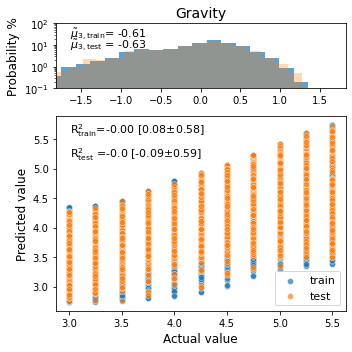

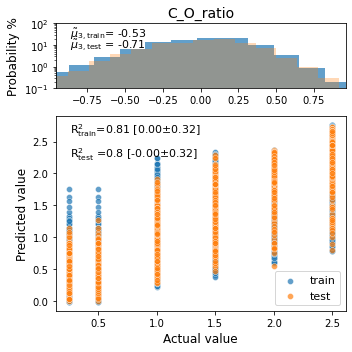

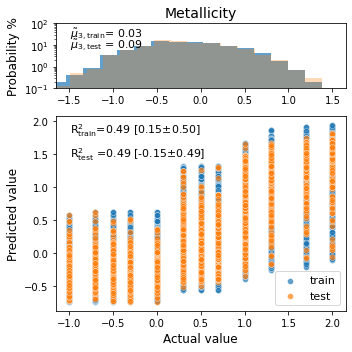

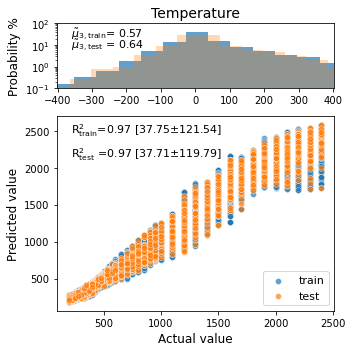

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )